# 2주차 스터디

## 3-step questions
1. 히트맵은 왜 사용하는걸까?

## 2.1.1 당노병 데이터셋 미리보기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 데이터의 어떤 항목들을 확인해봐야 하는걸까?

1. 고유값 확인 : value_counts() : 각 열의 고유값과 해당 값의 빈도를 확인하여 범주형 변수의 특징을 이해합니다.
2. 상관관계 확인 corr() : 수치형 변수 간의 상관 관계를 확인하여 변수 간의 관련성을 파악합니다.
3. 분포 확인 (hist(), boxplot()):수치형 변수의 분포를 히스토그램으로 시각화하거나 상자수염 그림을 사용하여 이상치를 확인합니다.
4. 날짜 데이터 처리:날짜 형식의 열이 있는 경우, 시간 경과에 따른 패턴을 확인하고 필요에 따라 시계열 데이터로 처리합니다.
5. 데이터 타입 확인 df.dtypes : 각 열의 데이터 타입이 예상과 일치하는지 확인하고 필요한 형태로 변환합니다.
6. 이상치 처리:상자수염 그림이나 Z-점수 등을 사용하여 이상치를 확인하고 필요한 경우 처리합니다.
7. 특이값 확인:도메인 지식을 활용하여 데이터에서 예상치 못한 특이값(Outlier)을 확인하고 처리합니다.
8. 클래스 불균형 확인:분류 문제의 경우 클래스 간의 불균형이 있는지 확인하고, 필요한 경우 적절한 대응 방안을 고려합니다.
9. 피처 엔지니어링 아이디어 수집:변수들 간의 상호작용이나 새로운 피처를 생성할 수 있는 아이디어를 수집하고, 이를 통해 모델의 성능을 향상시킬 수 있는지 고려합니다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_null = df.isnull()
df_null

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 2.1.2 결측치 보기

In [10]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [12]:
df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

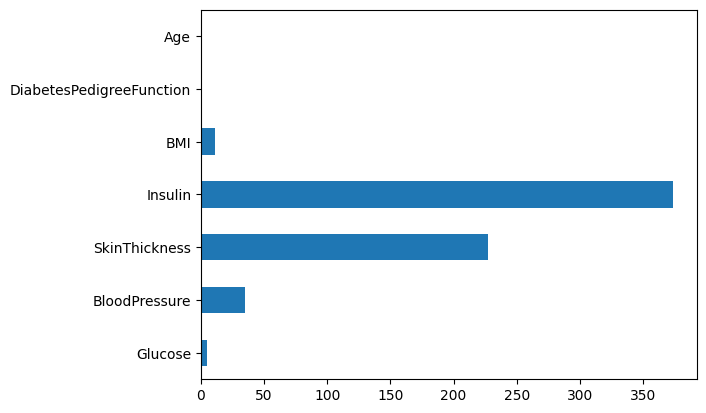

In [13]:
df_null.sum().plot.barh()

In [14]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

### 히트맵은 왜 그리는걸까?

- 아래의 히트맵에서 흰 부분으로 되어 있는곳이 곧 결측치 부분
- 이렇게 히트맵을 그려보면 어떤 컬럼에서 결측치가 많이 발생하는지 바로 알 수 있다. 

### 그럼 꼭 히트맵으로 그려봐야 하는걸까?
- nope! 그렇지는 않다. 결측치를 확인할 수 있는 방법은 여러가지가 있다. (다양하게 시각화 가능!)
- 다만 보통은 nan을 결측치로 잡아서 그려준다.

### 0을 결측치로 잡아서 시각화할 수는 없을까?
- 그래서 이 예제에서도 0을 nan으로 replace해서 시각화를 한다. 
- 하지만 꼭 nan으로 replace하지 않고도 시각화할 수 있는 방법이 있다!


<Axes: >

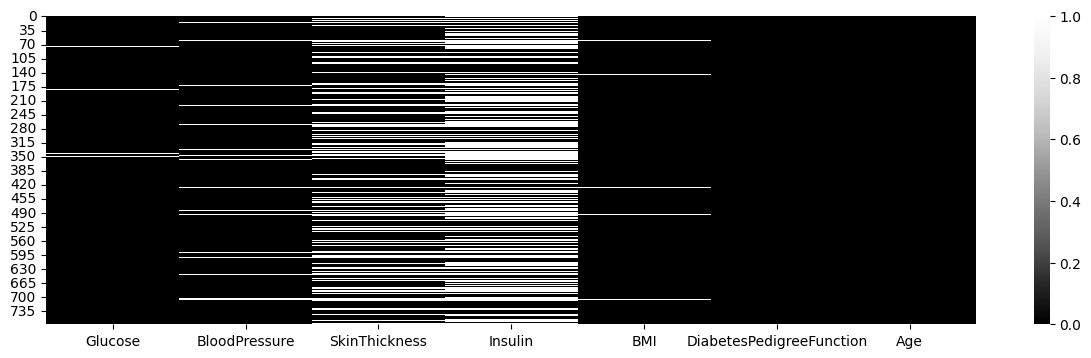

In [15]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null,cmap='Greys_r')

<Axes: >

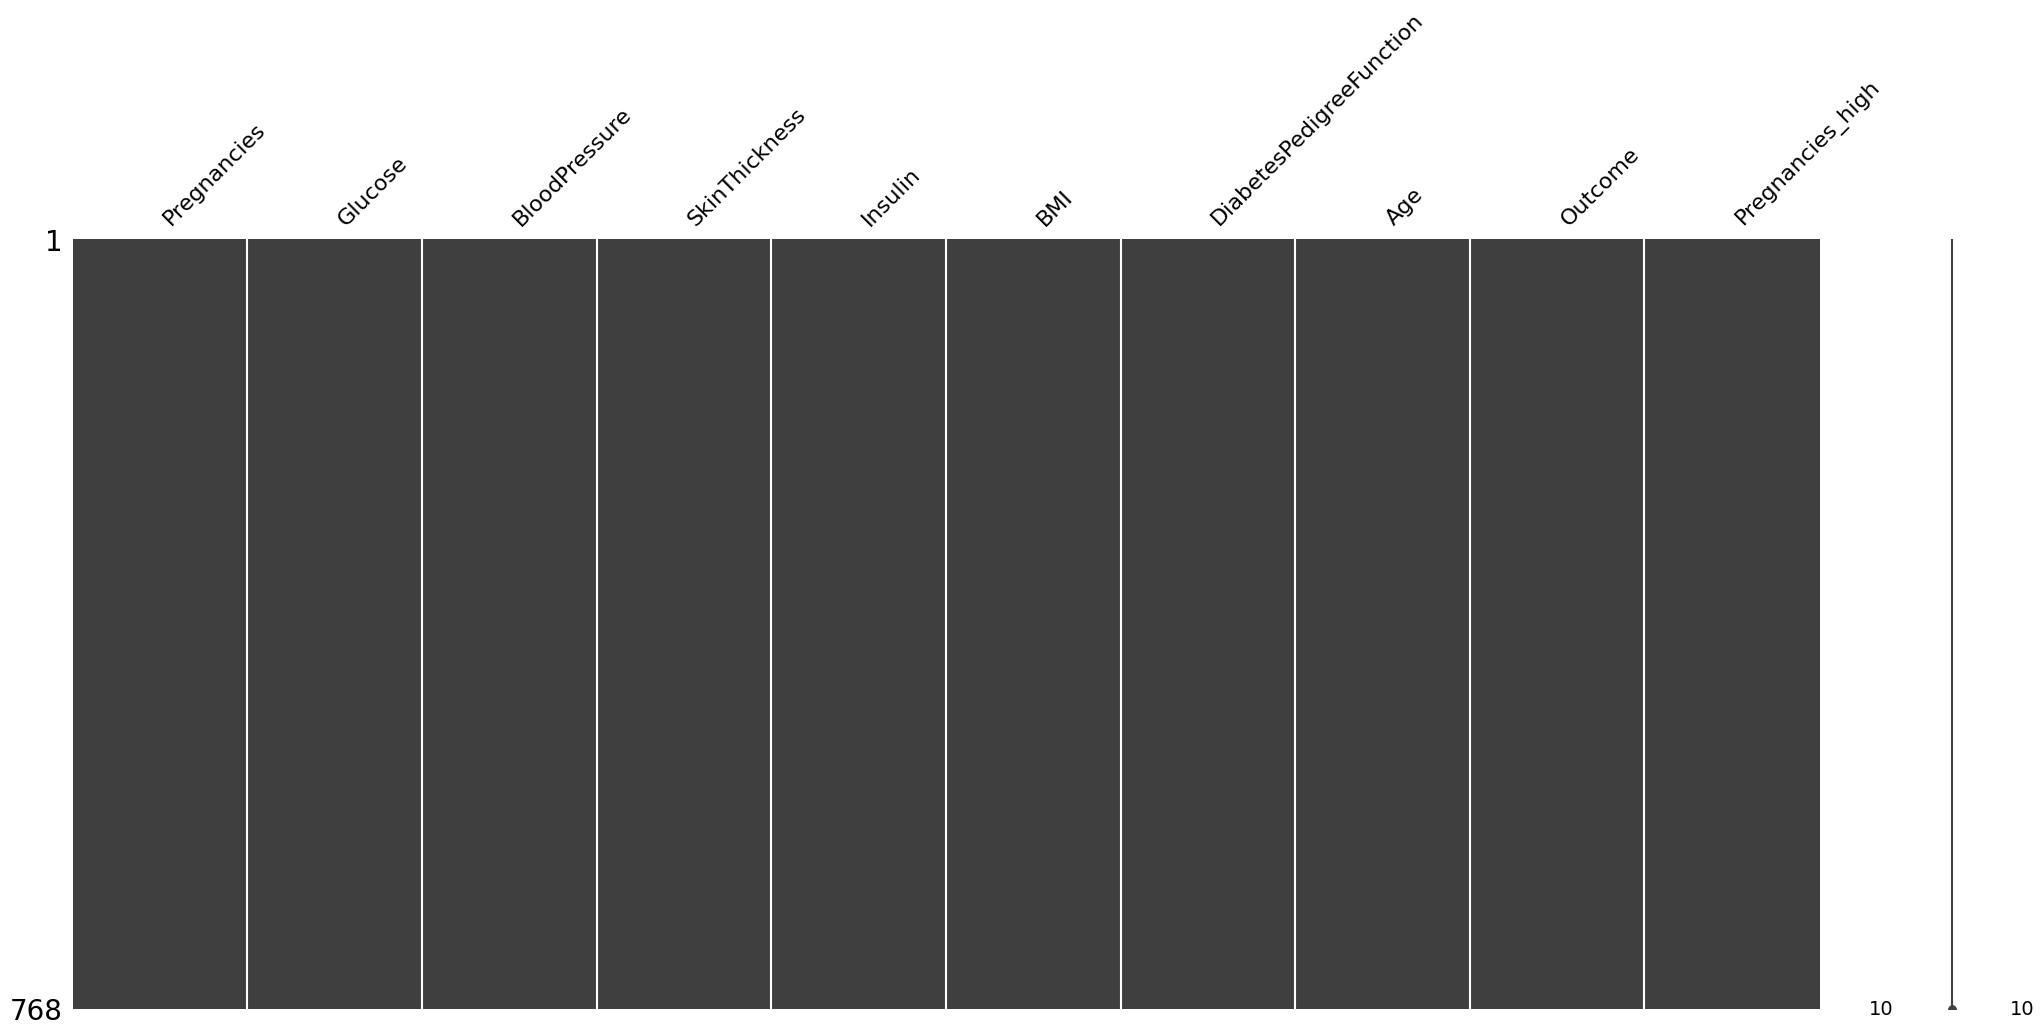

In [36]:
import missingno as msno
msno.matrix(df)

/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


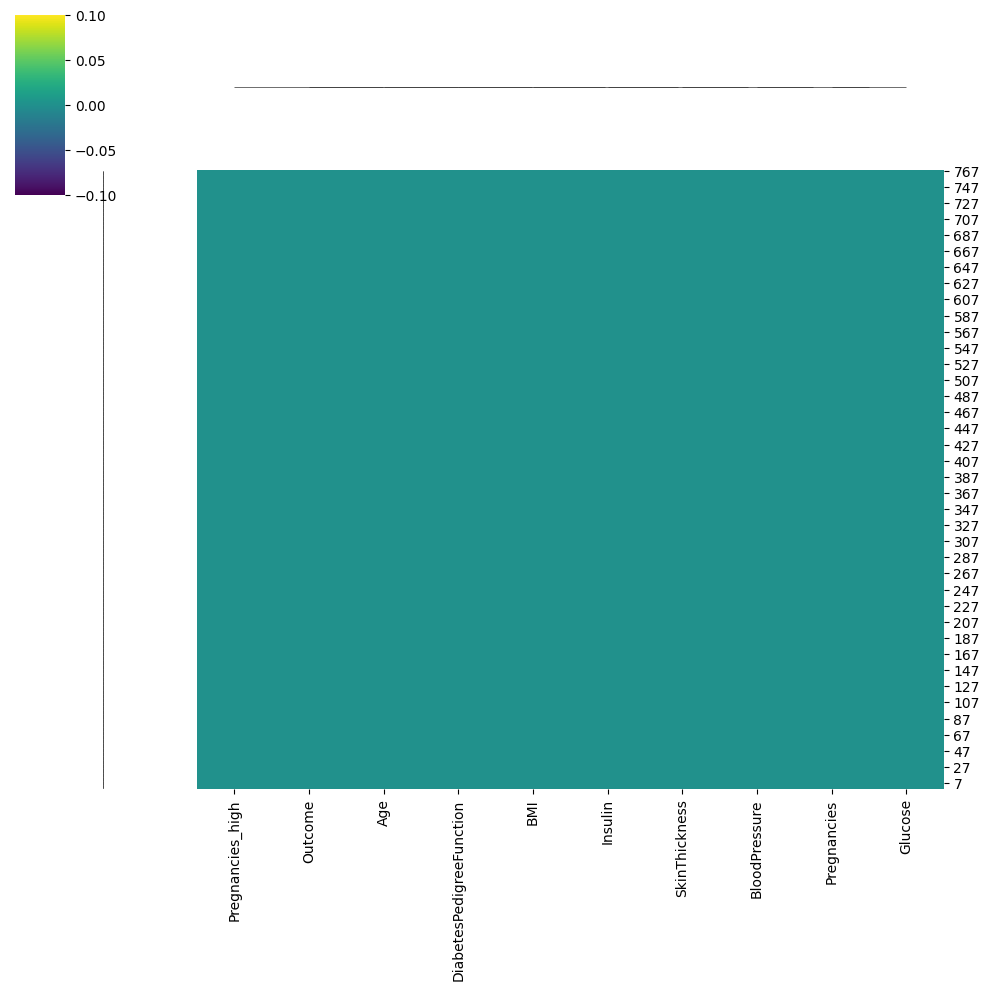

In [34]:
sns.clustermap(df.isnull(), cmap='viridis')
plt.show()

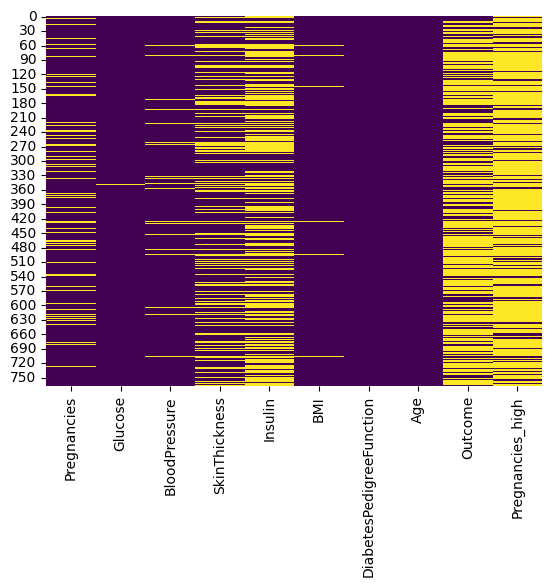

In [35]:
sns.heatmap(df == 0, cmap='viridis', cbar=False)
plt.show()

## 2.1.3 훈련과 예측에 사용할 정답값 시각화로 보기

In [16]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
df['Outcome'].value_counts()
#1은 발병
#0은 발병하지 않음.

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
df['Outcome'].value_counts(normalize=True)
#normalize를 해주면 각 값이 전체 데이터셋에서 차지하는 비율을 알 수 있다. 

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: >

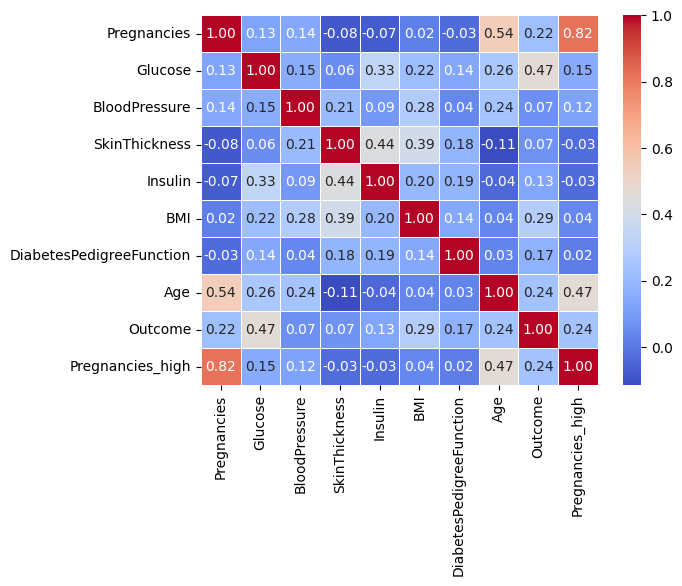

In [39]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [19]:
#Pregnancies'가 증가함에 따라 'Outcome'의 평균이 어떻게 변하는지를 파악할 수 있습니다. 
df.groupby(['Pregnancies'])['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [47]:
result = df.groupby(['Pregnancies', 'Age'])['Outcome'].mean()
result

Pregnancies  Age
0            21     0.142857
             22     0.235294
             23     0.250000
             24     0.444444
             25     0.461538
                      ...   
13           57     0.000000
14           38     1.000000
             46     1.000000
15           43     1.000000
17           47     1.000000
Name: Outcome, Length: 292, dtype: float64

KeyError: 'Pregnancies'

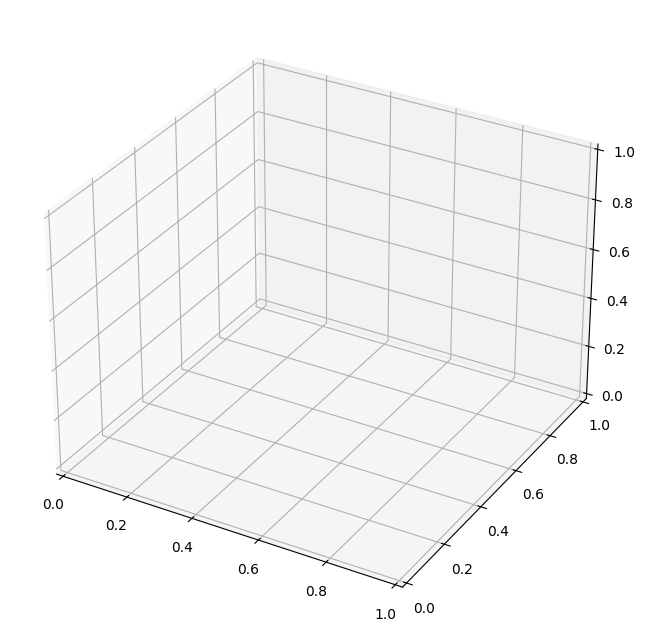

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 플로팅을 위한 Figure 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 'Pregnancies', 'Age'에 따른 'Outcome'과 'BloodPressure'의 평균값 플로팅
ax.scatter(result['Pregnancies'], result['Age'], result['Outcome'], c='r', marker='o', label='Outcome Mean')

# 축과 레이블 설정
ax.set_xlabel('Pregnancies')
ax.set_ylabel('Age')
ax.set_zlabel('Mean Values')
ax.set_title('Pregnancies and Age vs Mean Outcome and BloodPressure')
ax.legend()

# 플로팅 표시
plt.show()


In [20]:
df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count'])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [21]:
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

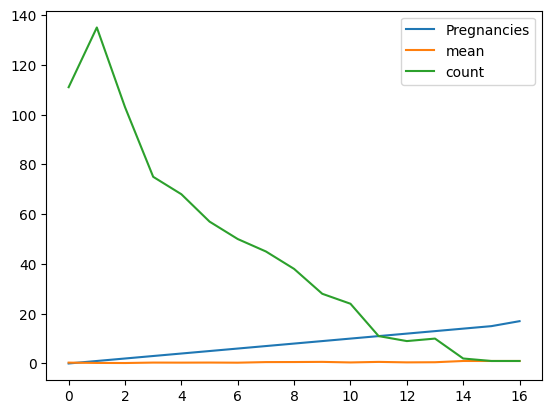

In [22]:
df_po.plot()

<Axes: >

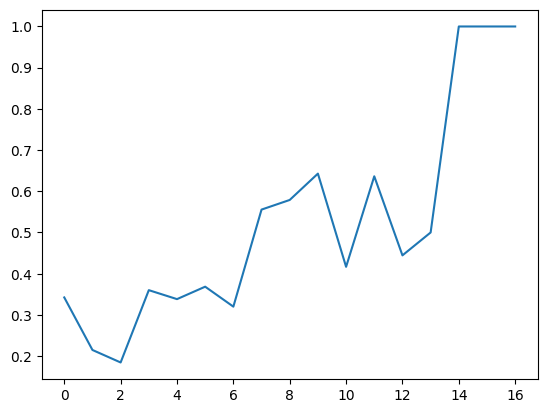

In [23]:
df_po['mean'].plot()

<Axes: xlabel='Outcome', ylabel='count'>

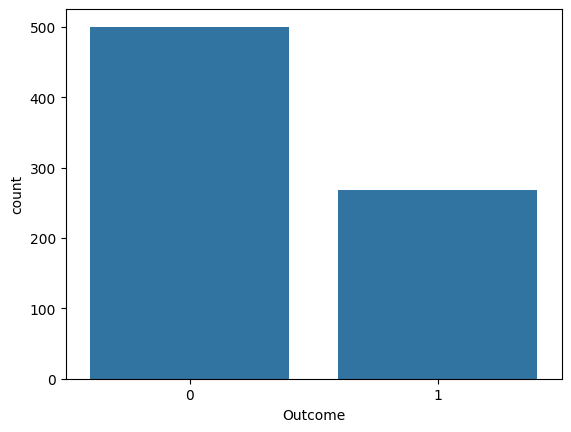

In [26]:
sns.countplot(data=df,x='Outcome')

<Axes: xlabel='Pregnancies', ylabel='count'>

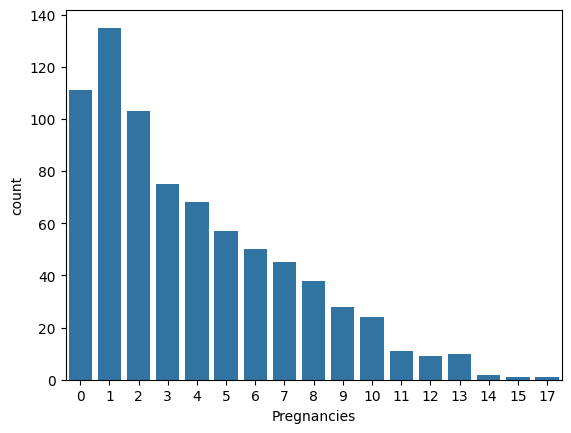

In [27]:
sns.countplot(data=df,x='Pregnancies')

<Axes: xlabel='Pregnancies', ylabel='count'>

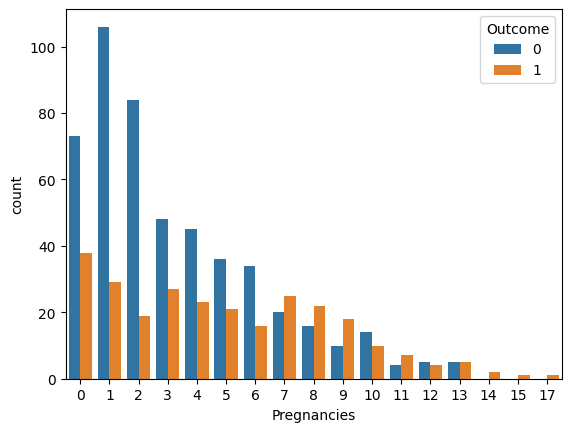

In [28]:
sns.countplot(data=df,x='Pregnancies',hue='Outcome')

In [29]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

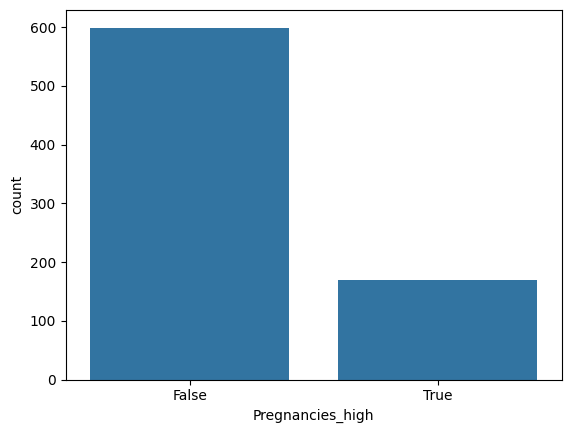

In [30]:
sns.countplot(data=df,x='Pregnancies_high')

<Axes: xlabel='Pregnancies_high', ylabel='count'>

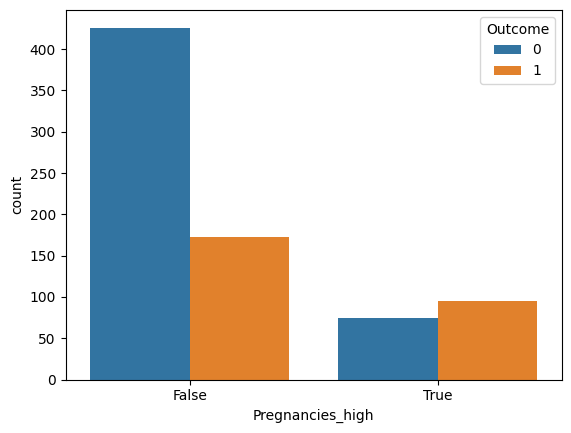

In [31]:
sns.countplot(data=df,x='Pregnancies_high',hue='Outcome')

## 2.1.4 두 개의 변수를 정답값에 따라 시각화 해보기


- barplot

- boxplot

- violinplot

- swarmplot

<Axes: xlabel='Outcome', ylabel='BMI'>

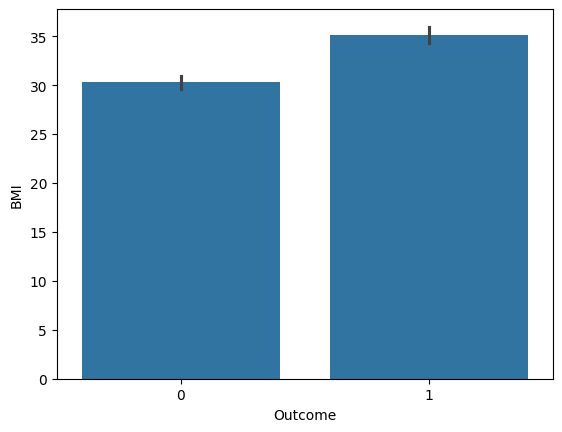

In [40]:
sns.barplot(data=df,x='Outcome',y='BMI')

<Axes: xlabel='Outcome', ylabel='Glucose'>

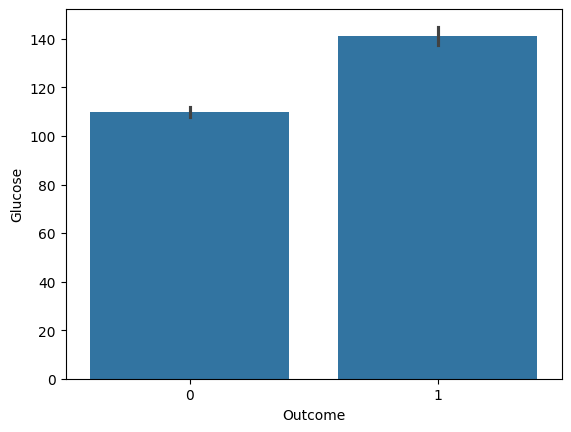

In [42]:
sns.barplot(data=df,x='Outcome',y='Glucose')

<Axes: xlabel='Outcome', ylabel='Insulin'>

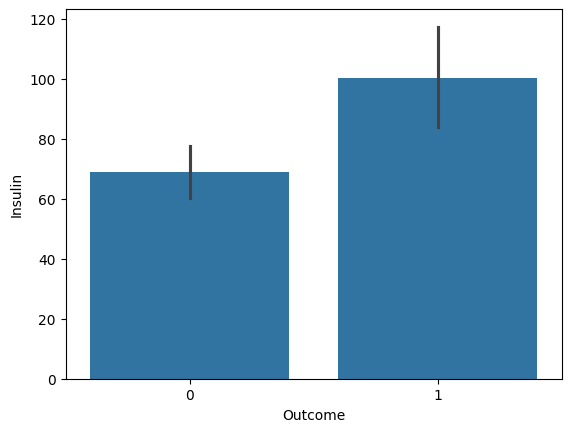

In [43]:
sns.barplot(data=df,x='Outcome',y='Insulin')

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

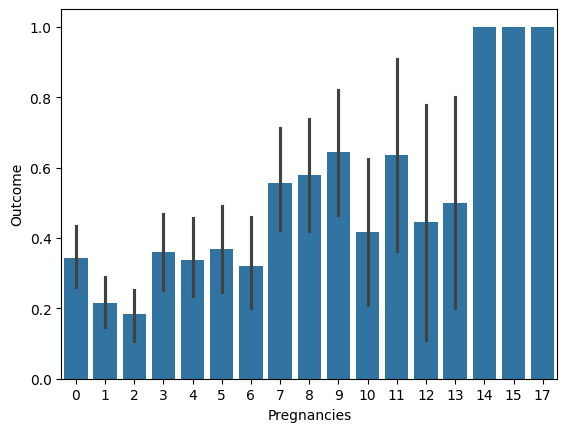

In [44]:
sns.barplot(data=df, x="Pregnancies", y="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

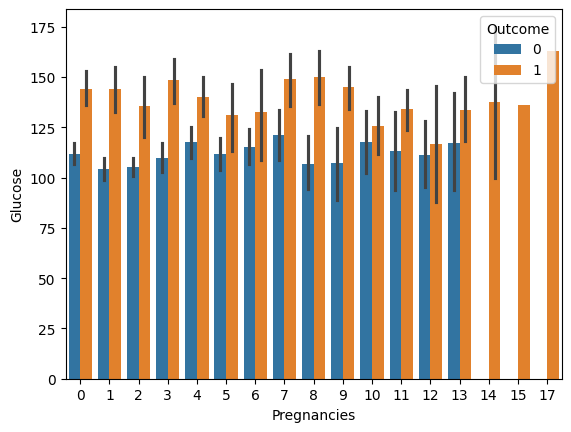

In [45]:
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")